# Homework 3

**Task 1 (10 points):** Assuming you are not familiar with the framework, in this part of the
homework you will present your research describing the resources you used to learn the
framework (must include links to all resources). Clearly explain why you needed a particular
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of
all the computations in a NN i.e., what libraries/tools do you need within this framework.)

The most commonly used machine learning API for tensorflow is Keras. Keras is a high level API using TensorFlow's computational graphs under the hood. Keras offers two different versions of the API. 

The first version is the Sequential API, this API has less functionality but is very simple to create models. In order to use the Sequential API all that is needed is to import `Sequential` from the library then create the sequential model using `model = Sequential()` and can create the layers by using `model.add(layer)`.

The second version of the API is the Functional API. This version is much more versatile and thus is used much more. The functional API explicitly creates the computational graphs by passing Tensor variables through each layer. For example, lets say we have a layer created called `layer` and we have the output of a previous layer `inpt` and we want to get the Tensor variable of passing `inpt` through `layer` this would simply be `output = layer(inpt)`. In this API we have to explicitly create an input layer to define the shape of the input whereas the other version can simply pass a `input_shape` argument in to the first layer. To create the input layer we import `Input` from keras and define `inpt = Input(shape)`. Once we have `inpt` defined and our output generated by passing `inpt` through each layer we want to include we can use the `Model` class to create the whole model. Thus we have `model = Model(inputs=inpt, outputs=output)`. Note that all models created in the Sequential API can be created in the Functional API but not all models created in the Functional API can be created in the Sequential API.

Keras also provides implementations of Neural Network layers to the user. Some of the common layers include `Dense`, `Conv2D`, `Input`, `MaxPool2D`, `Flatten` and many more. Each layer can either have the activation function passed as a string or the activation function can be passed as an argument or used as a separate layer. Each layer must be instantiated as a separate object as it needs to save the weights separately. Here is a full example of a model using the functional API.


In [1]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

inpt = Input((28,28,1))
output = Conv2D(16, 3, activation="relu")(inpt)
output = MaxPool2D()(output)
output = Conv2D(8, 3, activation="relu")(output)
output = MaxPool2D()(output)
output = Flatten()(output)
output = Dense(10, activation="softmax")(output)
model = Model(inputs=inpt, outputs=output)

model.summary()

2022-10-07 17:52:17.976814: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-07 17:52:24.578052: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-07 17:52:24.580218: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-07 17:52:24.600944: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:5e:00.0 name: TITAN RTX computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-10-07 17:52:24.602495: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:86:00.0 name: TITAN RTX computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-10-07 17:52:24.602522:

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2010  

In [2]:
# same model using sequential API
from tensorflow.keras import Sequential
model = Sequential([
    Conv2D(16, 3, input_shape=(28,28,1), activation="relu"),
    MaxPool2D(),
    Conv2D(8, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 3,330
Trainable params: 3,330
Non-trainable params: 0
______________________________________________________


Notice above Keras has constructed the computation graph and calculated the size of the Tensors needed for the calculation.

nce the model is constructed using the desired layers + activation functions, the user has to 'compile' the model to define the loss function + optimizer to use for training. Keras provides all major optimizers (`Adam` and `RMSProp`) as well as a large amount of Loss Functions used in many machine learning tasks + research. 

Keras rests on the Tensorflow library and as such uses Tensorflow's computational graphs under the hood to preform the calculations for the machine learning framework. Tensorflow has two central ideas to the library it provides Tensors (generalized forms of matrices[2 dimensional] / vectors [1 dimensional] in n-dimensions) and allowing for arbitrary computations to be setup and evaluated later. This means that operations can be easily optimized and parallelized for GPU computation. Additionally, this allows for certain Tensors to not be forced to have fixed dimension sizes note the example above output shape for the first dimension is `None`. This denotes the dimension for the batch size.

Since tensorflow uses computation graphs it makes computing the gradient very simple and efficient as all operations can be traced back to their origin. This allows for Tensorflow's auto differentiation. Most math functions in Tensorflow are differentiable and auto-differentiate with the use of `tf.gradients` and `tf.GradientTape`. 

**Task 2 (60 points):** Once you have figured the resources you need for the project, design, and
implement your project. The project must include the following steps (it’s not limited to these
steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.
6. Present the results using the test set.

NOTE: In this step, once you have implemented your 2-layer network you may increase and/or
decrease the number of layers as part of the hyperparameter tuning process.

In the first step we just download the dateset and load it into memory. Here is the link to the dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist.

In [3]:
import os 
import pandas as pd

folder_name = "./fashionmnist"
file_name = "fashion-mnist_train.csv"


if not os.path.exists(folder_name):
    import opendatasets as od
    # download the data
    dataset_link = "https://www.kaggle.com/datasets/zalando-research/fashionmnist"
    od.download(dataset_link)

data = pd.read_csv(os.path.join(folder_name, file_name))
y = data['label']
x = data.drop('label', axis=1)
x.head()
x = x.to_numpy()
y = y.to_numpy()

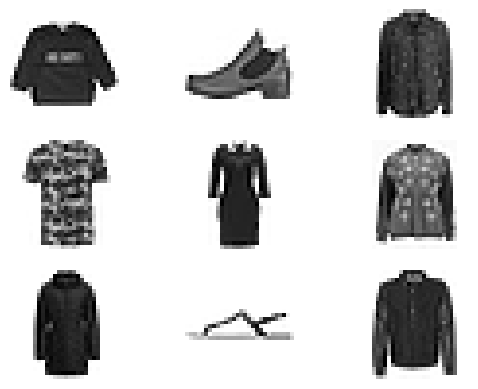

In [4]:
# visualize the data
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, 1 + i)
    plt.axis('off')
    plt.imshow(255 - x[i].reshape((28,28,1)), cmap='gray')
    
plt.show()

It seems that the images are from 0-255 inverted from real-life colors, the inversion doesn't matter too much for our purposes but should keep them in mind if we were to roll this model out into the real world. However, we should normalize the images to $\mu = 0$ and $\sigma = 1$ after we split our test from train as to not corrupt the train data. We will use the mean from the train data for our test data.

In [5]:
y[0:10]

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8])

Also it seems our y values are categorical which we will have to one hot encode

In [6]:
import numpy as np

def expand_one_hot(number, nums):
    out = np.zeros((nums,))
    out[number] = 1
    return out

def one_hot_encode(a):
    mapping = {}
    index = 0
    for item in a:
        if item not in mapping:
            mapping[item] = index
            index += 1


    out = np.zeros((len(a), index))

    for i, item in enumerate(a):
        out[i] = expand_one_hot(mapping[item], index)

    return out

y = one_hot_encode(y)
y[0:3]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

Here I will normalize as a whole and not by attribute as we are working with pixel data ie. not using `axis=1` in `np.mean` and `np.std` as normal.

In [7]:

split_train = 0.7
split_dev = 0.2
split_index_train = int(len(x) * split_train)
split_index_dev = int(len(x) * (split_train + split_dev))

order = np.arange(len(x))
np.random.shuffle(order)
x[order] = x
y[order] = y

x_train, y_train = x[:split_index_train], y[:split_index_train]
x_dev, y_dev = x[split_index_train:split_index_dev], y[split_index_train:split_index_dev]
x_test, y_test = x[split_index_dev:], y[split_index_dev:]

mu_x = np.mean(x_train)
std_x = np.std(x_train)

x_train = (x_train - mu_x) / std_x
x_dev = (x_dev - mu_x) / std_x
x_test = (x_test - mu_x) / std_x


In [8]:

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# the baseline model has no tuning and hyper parameters were chosen at random
# see the second model below for tuned model
baseline_model = Sequential([
    Dense(128, input_shape=(28*28,), activation="relu"),
    Dense(10, activation="softmax")
])

def cross_entropy_loss(y_true, y_pred):
    # we include the epsilon as without it the loss can converge to nan
    # if one of y_pred = 0
    # this is extremely bad behavior but we can easily avid it
    # by making the lowest possible value in the log epsilon
    eps = 1E-6
    return -tf.tensordot(y_true, tf.math.log(y_pred + eps), axes=2)

baseline_model.compile(loss=cross_entropy_loss, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

baseline_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-10-07 17:52:40.016487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-07 17:52:40.017890: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/40


2022-10-07 17:52:40.518033: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1313/1313 [==============================] - 4s 3ms/step - loss: 18.8415 - accuracy: 0.7897 - val_loss: 15.7438 - val_accuracy: 0.8321
Epoch 2/40
1313/1313 [==============================] - 3s 2ms/step - loss: 11.2191 - accuracy: 0.8721 - val_loss: 10.5967 - val_accuracy: 0.8783
Epoch 3/40
1313/1313 [==============================] - 3s 2ms/step - loss: 9.4674 - accuracy: 0.8904 - val_loss: 10.0019 - val_accuracy: 0.8837
Epoch 4/40
1313/1313 [==============================] - 2s 2ms/step - loss: 8.7404 - accuracy: 0.8983 - val_loss: 9.0585 - val_accuracy: 0.8964
Epoch 5/40
1313/1313 [==============================] - 2s 2ms/step - loss: 7.8615 - accuracy: 0.9100 - val_loss: 8.2858 - val_accuracy: 0.9057
Epoch 6/40
1313/1313 [==============================] - 2s 2ms/step - loss: 7.1207 - accuracy: 0.9181 - val_loss: 8.0146 - val_accuracy: 0.9101
Epoch 7/40
1313/1313 [==============================] - 2s 2ms/step - loss: 6.6370 - accuracy: 0.9248 - val_loss: 8.5350 - val_accuracy: 0.905

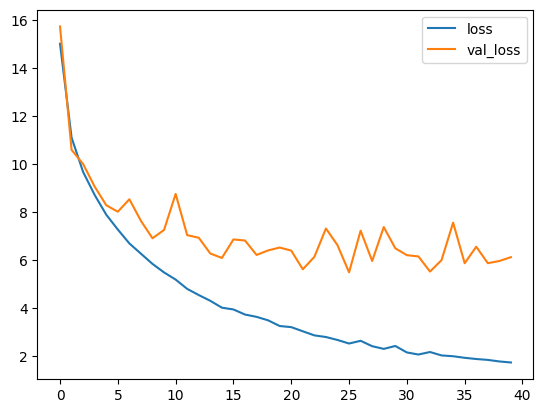

In [9]:

epochs = 40

def make_plot(history, loc):
    plot = plt.plot(np.array([history[item] for item in loc]).T)
    plt.legend(plot, loc, loc=1)
    plt.show()

h = baseline_model.fit(x=x_train, y=y_train, validation_data=(x_dev, y_dev), epochs=epochs)
loc1 = ['loss', 'val_loss']
make_plot(h.history, loc1)


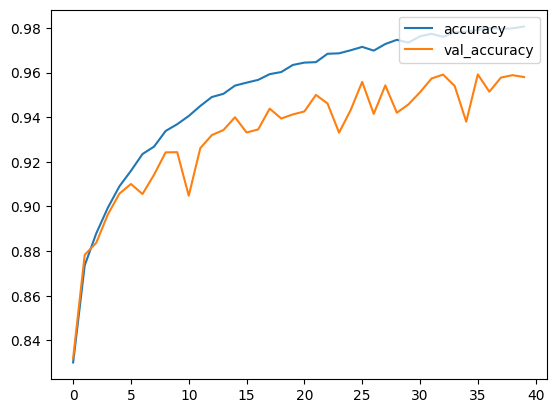

In [10]:
loc2 = ['accuracy', 'val_accuracy']
make_plot(h.history, loc2)


In [11]:
print("loss: {:.5f}, accuracy: {:.5f}".format(*baseline_model.evaluate(x_test, y_test, verbose=0)))

loss: 5.83534, accuracy: 0.95784


Check task 3 for a full in-depth explaination for usage of activation functinos 

In [12]:
from tensorflow.keras.layers import ReLU, Add, AveragePooling2D
from tensorflow.keras.regularizers import L2

# based on the ResNet architecture https://arxiv.org/pdf/1512.03385.pdf
# kernel_initializers chose to keep mu=0, sigma=1, see below for more
# padding was chosen to mimic a Conv2D operation over the whole block
# while providing the skip connection the alleviate the vanishing gradient
# problem with deep neural networks
def res_block(f1, f2, f3, stride, k, x, regularizer):
    x_skp = x
    x_skp = Conv2D(f3, 1, stride, padding="valid", kernel_initializer="he_uniform", kernel_regularizer=regularizer)(x_skp)

    x = Conv2D(f1, 1, stride, kernel_initializer="he_uniform", kernel_regularizer=regularizer)(x)
    x = ReLU()(x)
    
    x = Conv2D(f2, k, 1, padding="same", kernel_initializer="he_uniform", kernel_regularizer=regularizer)(x)
    x = ReLU()(x)

    x = Conv2D(f3, 1, 1, padding="valid", kernel_initializer="he_uniform", kernel_regularizer=regularizer)(x)

    x = Add()([x, x_skp])
    x = ReLU()(x)

    return x

# the value for the regularizer was tuned
# the original value that was tested was the
# default value of 0.01
# but this seemed to penalize the loss too much
regularizer = L2(0.001)

# the input shape will have to be reshaped to allow for Conv2D to work
inpt = Input((28,28,1))
# initial convolution to get general features, filter value was tuned other values were from the 
# paper
output = Conv2D(32, 7, 1, activation="relu", kernel_initializer="he_uniform", kernel_regularizer=regularizer)(inpt)
# values for the max pool layer was used from paper
output = MaxPool2D(3, 2)(output)
# started with smaller than the paper but used same rule 
# prev_f, prev_f, 4*prev_f
output = res_block(32, 32, 128, 2, 3, output, regularizer)
# 2*pref_f1, 2*pref_f1, 8*pref_f1 
output = res_block(64, 64, 256, 1, 3, output, regularizer)
# 2*pref_f1, 2*pref_f1, 8*pref_f1 
output = res_block(128, 128, 512, 1, 3, output, regularizer)
# used window size of 3 to reduce (5,5,512) -> (1,1,512) to compress the image
output = AveragePooling2D(3)(output)
output = Flatten()(output)
output = Dense(10, activation="softmax", kernel_initializer="glorot_uniform", kernel_regularizer=regularizer)(output)

model_2 = Model(inputs=inpt, outputs=output)

model_2.compile(loss=cross_entropy_loss, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 22, 22, 32)   1600        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 10, 10, 32)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 5, 5, 32)     1056        max_pooling2d_4[0][0]            
____________________________________________________________________________________________

Epoch 1/40


2022-10-07 17:54:25.132013: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-07 17:54:33.532185: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-07 17:54:33.781363: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1313/1313 [==============================] - 234s 103ms/step - loss: 34.9110 - accuracy: 0.7215 - val_loss: 17.6256 - val_accuracy: 0.8432
Epoch 2/40
1313/1313 [==============================] - 13s 10ms/step - loss: 15.6472 - accuracy: 0.8642 - val_loss: 14.2241 - val_accuracy: 0.8752
Epoch 3/40
1313/1313 [==============================] - 13s 10ms/step - loss: 12.8943 - accuracy: 0.8934 - val_loss: 12.7111 - val_accuracy: 0.8921
Epoch 4/40
1313/1313 [==============================] - 12s 9ms/step - loss: 11.4027 - accuracy: 0.9095 - val_loss: 11.2204 - val_accuracy: 0.9098
Epoch 5/40
1313/1313 [==============================] - 12s 9ms/step - loss: 10.1661 - accuracy: 0.9213 - val_loss: 10.3730 - val_accuracy: 0.9194
Epoch 6/40
1313/1313 [==============================] - 12s 9ms/step - loss: 8.9635 - accuracy: 0.9343 - val_loss: 9.7130 - val_accuracy: 0.9296
Epoch 7/40
1313/1313 [==============================] - 12s 9ms/step - loss: 8.3507 - accuracy: 0.9430 - val_loss: 9.9123 - va

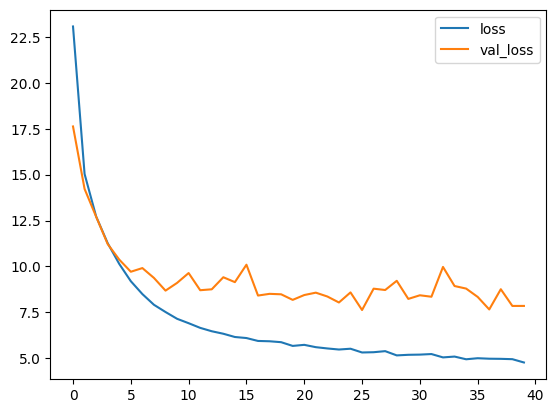

In [13]:
epochs = 40

h = model_2.fit(x_train.reshape((len(x_train), 28,28,1)), y_train, validation_data=(x_dev.reshape((len(x_dev),28,28,1)), y_dev), epochs=epochs)

make_plot(h.history, loc1)

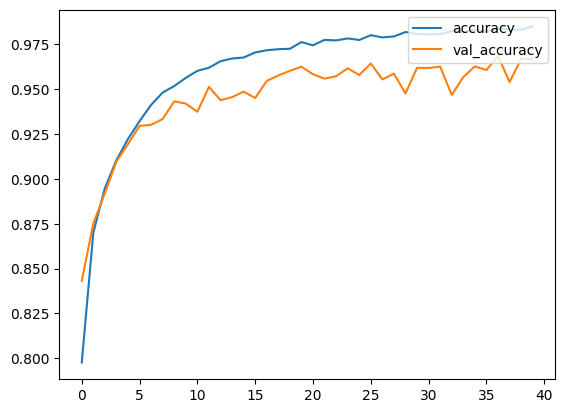

In [14]:
make_plot(h.history, loc2)

In [15]:
print("loss: {:.5f}, accuracy: {:.5f}".format(*model_2.evaluate(x_test.reshape(len(x_test), 28,28,1), y_test, verbose=0)))

loss: 7.36631, accuracy: 0.96684


**Task 3 (10 points):** In task 2 describe how you selected the hyperparameters. What was the
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use
an optimization algorithm? Why or why not?

I based the tuned model on the ResNet architecture (https://arxiv.org/pdf/1512.03385.pdf). In this paper, they created the first truly deep neural networks, utilizing skip connections to prevent the vanishing gradients seen at the time in such problems. 

The learning rate I chose was based on starting with Adam's default learning rate parameter and tuning it to achieve better accuracies.

Here are some modifications I made to suit the problem: the first was to reduce the size of the model as the dataset used is much easier to learn. Additionally, in the paper they used batch normalization (taking $Z$ subtracting by the exponentially weighted average of the mean and dividing by the exponentially weighted average of the standard deviation) but in my model I opted for L2 regualarization instead. We should not use both together as using L2 in conjunction with batch normalization as it is shown that leads to batch normalization being cancelled out by L2 weight regularization. I chose L2 because it is now the standard for regularization and is used much more often than batch normalization and I did not want the model to overfit to the training set as it it did even with a small model in the baseline. 

The parameters for filters were chosen simply by base 2's with with the first layer being an arbitrary amount adjusted by hand the `f1,f2,f3` respectively of the first residual block being chosen as `f1=f2, f3=f1*4` and `f1` being the same as the previous layers filters. For the later residual blocks `f1_n = f3_{n-1} / 2` as was done in the paper and finally taking an average pool of that, flattening and using a linear layer of the size equal to the number of classes. 

The activation functions were chosen as ReLU as this too is the standard activation function used in much of the state of the art models (except for LeakyReLU as it helps in avoiding the vanishing gradient problem, but in this context the results are similar). The final activation function must be softmax as to ensure the output layer sums to 1, this is important for crossentropy loss and cannot cheat the output by hedging its bets across multiple classes as would a sigmoid function. 

Additionally, I used kernel initializers on each layer to ensure the model trains efficiently. Using the correct kernel initializers have been shown to reduce both bias and variance (https://arxiv.org/pdf/1511.06422.pdf). The correct choice of initalizer depends solely on the activation function about to be applied for ReLU type activation functions one should apply the He Unfiorm initializer whereas for probabilistic based activation functions the use of Glorot Uniform is encouraged. These initalizers ensure that the initial weights produce data that has mean as 0 and most importantly variance is 1. If unused, especially with very deep networks, leads to either exploding or vanishing gradients as the variances will compound $\sigma^2_n = (\sigma^2)^l$ where $l$ is the number of layers and $n$ represents the network. When kernel initializers were unused my model performed worse than the baseline at 0.94 accuracy whereas when they were properly used it achieved an accuracy of 0.967.

I used the Adam optimizer. At this point the Adam optimizer is the default for all state of the art models as it provides the most stability to training (https://arxiv.org/pdf/1910.05446.pdf). SGD is too unstable, Batched Gradient Descent requires too much memory, and RMSProp achieves close to the same performance on most models (sometimes beating out Adam) but is most of the time inferior to Adam.

One interesting difference that allows the second version of the model to excel is the ability to approximate more complex functions with the larger model. We can see that in the baseline the validation loss / accuracy quickly separates from the training loss / accuracy and is an indication that the small model is not able to categorize the data properly and is instead likely relying on features that are sparse in the data. This tells us that with large datasets we can use larger models to give us better performance overall. Notice, even in the graph we have not reached early stopping point yet (I had to stop at that point to conserve power on my laptop) and we could have trained for even more epochs to create a model that beats the other by an even larger margin.

**Task 4 (20 points):** Create another baseline model (can be any model we covered so far except a
deep learning model). Using the same training data (as above) train your model and evaluate
results using the test set. Compare the results of both models (the Neural Network and the
baseline model). What are the reasons for one model performing better (or not) than the
other? Explain.

In [16]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier()

dt.fit(x_train, y_train)
print("train", accuracy_score(y_train, dt.predict(x_train)))
print("test", accuracy_score(y_test, dt.predict(x_test)))

train 1.0
test 0.9500083319446759


The decision tree seems to come close to the performance of the baseline but is beat by the tuned model. This is likely a result of the decision boundary of the data being too complex for the decision tree to properly generalize to. Instead, it seems to have overfit the data slightly as it predicts the train data with 100% accuracy but the test data with 95.4% accuracy. The tuned model is simply bigger and has the ability to better represent the decision boundary. As mentioned above the larger model is able to utilize the adavantange of having a large amount of complex data to best represent the relationship between the image and the category.